In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("smartcart_customers.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [4]:
df.shape

(2240, 22)

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Data Preprocessing

# 1.Handling missing values

In [6]:
df["Income"] = df["Income"].fillna(df["Income"].median())

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


# 2.Feature Engineering

In [9]:
# Customer age

df["Age"] = 2026 - df["Year_Birth"]

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,88,3,8,10,4,7,0,1,69
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,6,2,1,1,2,5,0,0,72
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,21,42,1,8,2,10,4,0,0,61
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,5,2,2,0,4,6,0,0,42
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,27,15,5,5,3,6,5,0,0,45


In [11]:
# Customer Joining date

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

df["Customer_Tenure_Days"] = (pd.Timestamp.now() - df["Dt_Customer"]).dt.days

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,4907
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,4357
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,4556
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,4383
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,4405


In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days'],
      dtype='object')

In [14]:
# Calc total spending

df["Total_Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,8,10,4,7,0,1,69,4907,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,1,2,5,0,0,72,4357,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,0,0,61,4556,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,2,0,4,6,0,0,42,4383,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,5,3,6,5,0,0,45,4405,422


In [16]:
# Calc Childern 
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,1,69,4907,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,72,4357,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,61,4556,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,42,4383,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,45,4405,422,1


In [18]:
# Education

df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [19]:
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate", "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate", "PhD": "Postgraduate"
})   

In [20]:
df["Education"].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [21]:
# Marital status

df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [22]:
df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner", "Together": "Partner",
    "Single": "Alone", "Divorced": "Alone",
    "Widow": "Alone", "Absurd": "Alone", "YOLO": "Alone" 
})

In [23]:
df["Living_With"].value_counts()

Living_With
Partner    1444
Alone       796
Name: count, dtype: int64

# 3. Drop columns

In [24]:
df_cleaned = df.drop(columns = ["ID", "Year_Birth", "Marital_Status", "Kidhome", "Teenhome", "Dt_Customer","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"])

df_cleaned.shape

(2240, 15)

In [25]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,4907,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,4357,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,4556,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,4383,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,4405,422,1,Partner


# Outliers detection

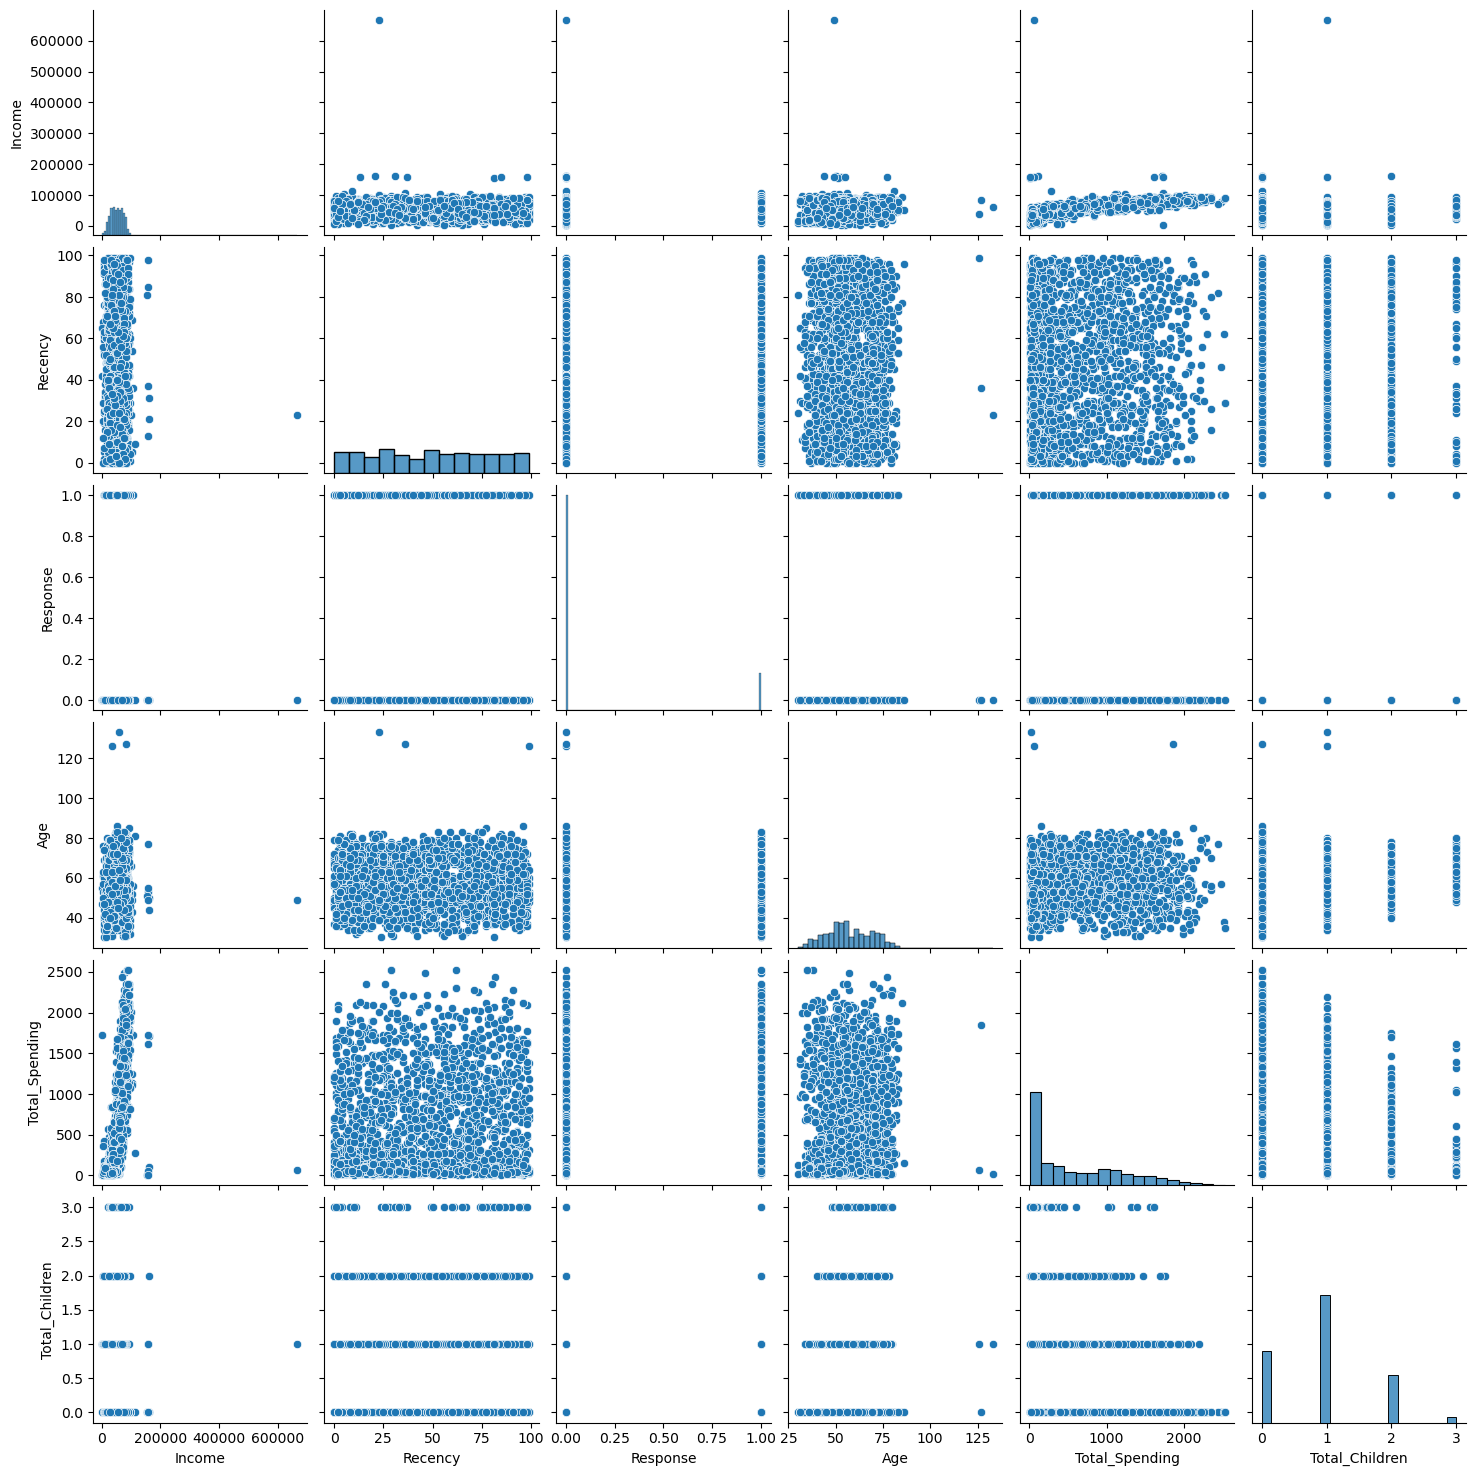

In [26]:
sns.pairplot(df_cleaned[["Income", "Recency", "Response", "Age", "Total_Spending", "Total_Children"]])

In [27]:
# Removing outliers

print("Data size before removing outliers:", len(df_cleaned))

df_cleaned = df_cleaned[(df_cleaned["Age"] < 90)]
df_cleaned = df_cleaned[(df_cleaned["Income"] < 600_000)]

print("Data size after removing outliers:", len(df_cleaned))

Data size before removing outliers: 2240
Data size after removing outliers: 2236


In [28]:
# Correlation Heatmap

corr = df_cleaned.corr(numeric_only = True)

<Axes: >

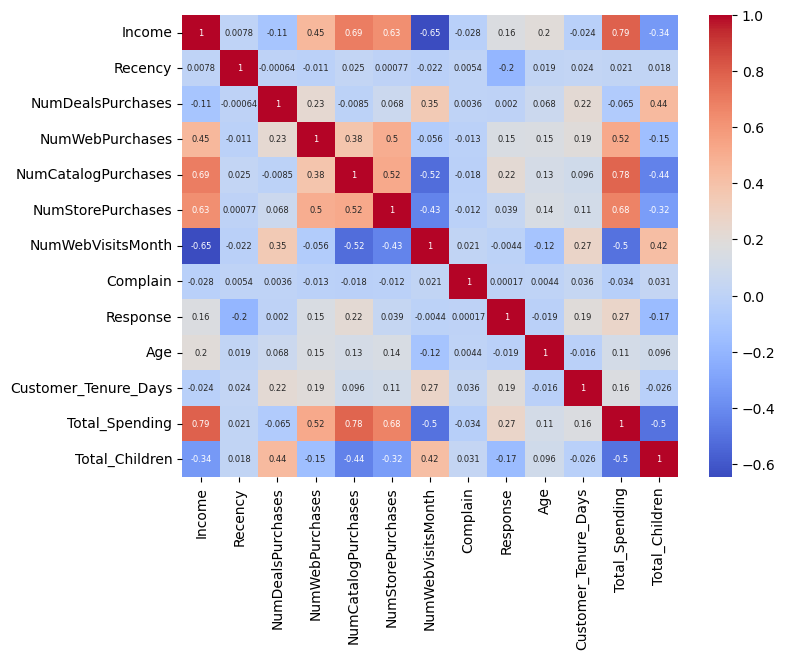

In [29]:
plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size": 6},
    cmap="coolwarm"
)

# Encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
ohe = OneHotEncoder()

cat_cols = ["Education", "Living_With"]

enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

In [32]:
# converting the encoded value into df

enc_df = pd.DataFrame(enc_cols.toarray(), columns=ohe.get_feature_names_out(cat_cols), index=df_cleaned.index)

In [33]:
enc_df.head()

,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [34]:
df_cleaned = df_cleaned.drop(columns=cat_cols)

In [35]:
df_encoded = pd.concat([df_cleaned, enc_df], axis=1)

In [36]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,4907,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,4357,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,4556,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,4383,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,4405,422,1,0.0,1.0,0.0,0.0,1.0


# Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
X = df_encoded

In [39]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Visualize

In [40]:
X_scaled.shape

(2236, 18)

In [41]:
# 2D

from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=3) #Just change the n_components value to change the dimensions from 1d or 2d or 3d and so on

X_pca = pca.fit_transform(X_scaled)

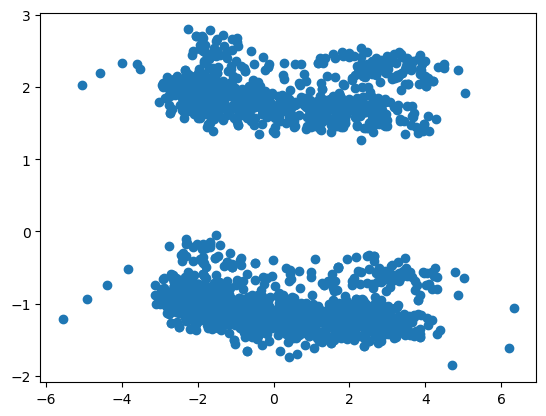

In [54]:
# plot 

plt.scatter(X_pca[:,0], X_pca[:,1])

In [55]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

Text(0.5, 0.92, '3D Projection')

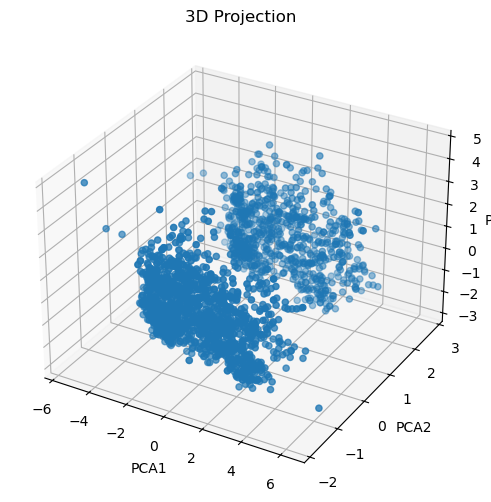

In [59]:
# 3D

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2])
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D Projection")
#Just change the n_components value to 3 for 3D visualization in PCA

# Analyze K value
# 1.Elbow Method

In [61]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [62]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

In [63]:
knee = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")

optimal_k = knee.elbow

In [65]:
print(optimal_k)

4


Text(0, 0.5, 'WCSS')

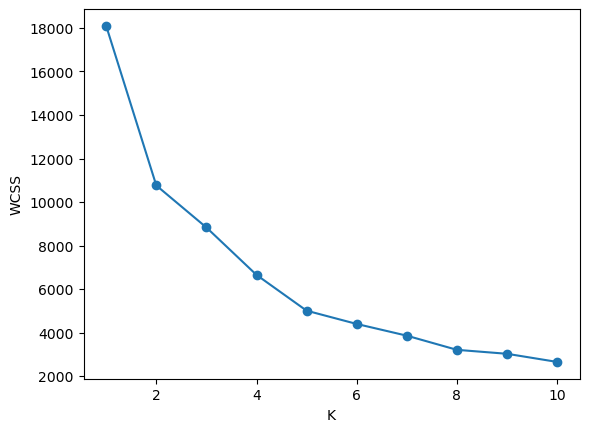

In [66]:
# Plot

plt.plot(range(1,11), wcss, marker="o")
plt.xlabel("K")
plt.ylabel("WCSS")

# 2.Silhouette Score

In [68]:
from sklearn.metrics import silhouette_score

ss=[]

for i in range (2,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    labels=kmeans.fit_predict(X_pca)
    ss.append(silhouette_score(X_pca, labels))

Text(0, 0.5, 'Silhouette Score')

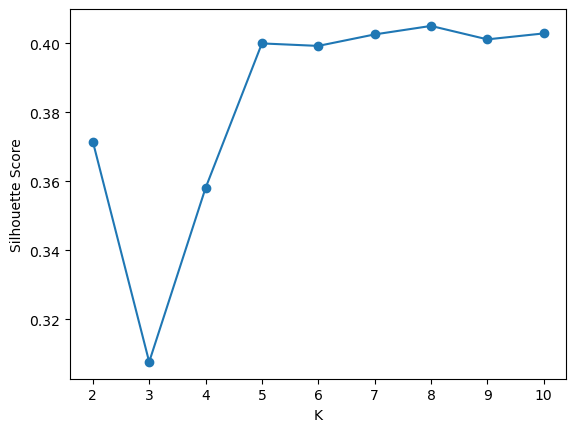

In [69]:
# Plot

plt.plot(range(2,11), ss, marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

Text(0.5, 1.0, 'WCSS + SS')

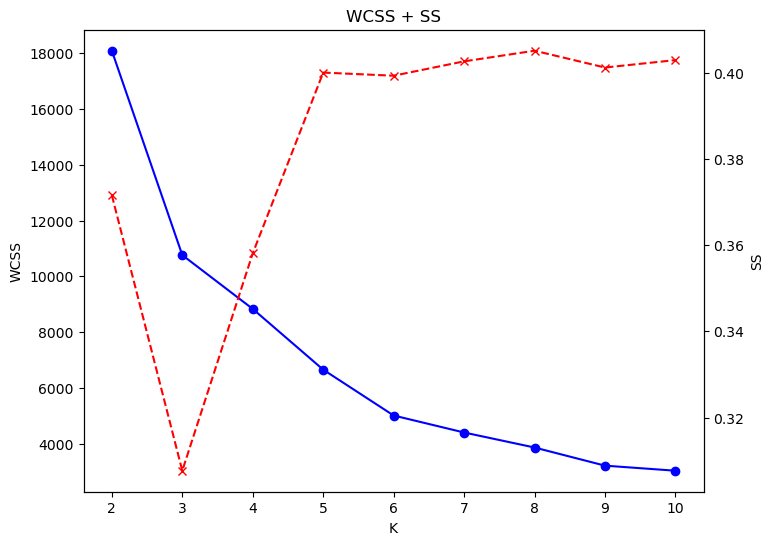

In [74]:
# wcss and ss together 

k_range = range(2,11)

fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(k_range, wcss[:len(k_range)], marker="o", color="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2=ax1.twinx()
ax2.plot(k_range, ss[:len(k_range)], marker="x", color="red", linestyle="--")
ax2.set_ylabel("SS")

plt.title("WCSS + SS")

# Clustering 

In [76]:
# Kmeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca) 

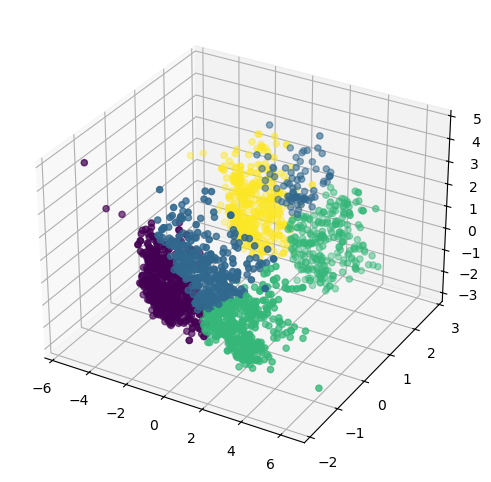

In [78]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels_kmeans)

In [80]:
# Agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

In [84]:
agg_clf = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_agg = agg_clf.fit_predict(X_pca)

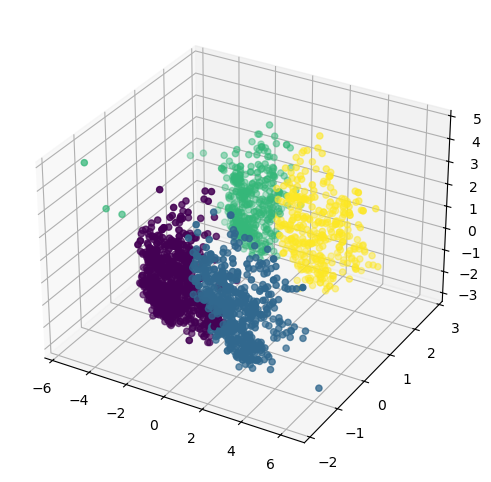

In [86]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels_agg)

# Characterization of clusters

In [93]:
X["clusters"] = labels_agg

In [94]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,clusters
0,58138.0,58,3,8,10,4,7,0,1,69,4907,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,4357,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,4556,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,4383,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,4405,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='clusters', ylabel='count'>

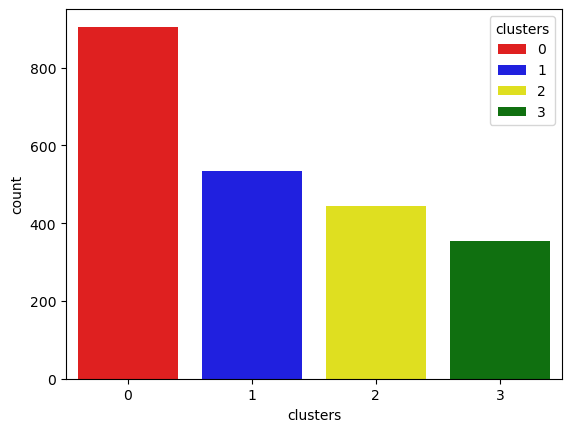

In [95]:
pal = ["red", "blue", "yellow", "green"]

sns.countplot(x=X["clusters"], palette=pal, hue=X["clusters"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

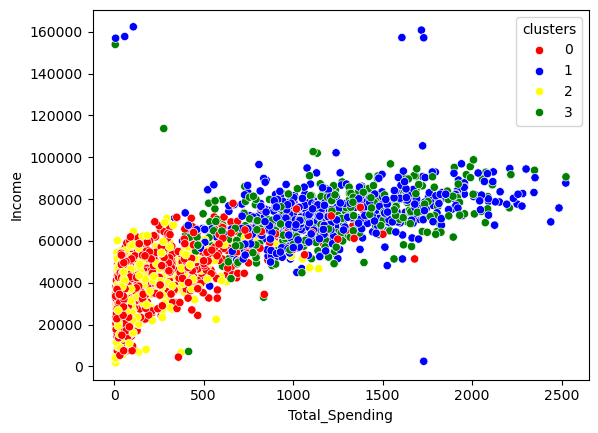

In [92]:
# Income and spending patterns

sns.scatterplot(x=X["Total_Spending"], y=X["Income"], palette=pal, hue=X["clusters"])

# red = low/moderate income,spending
# blue = high income,spending
# yellow = low income,spending
# green = moderate income, high spending

In [97]:
# cluster summary

cluster_summary = X.groupby("clusters").mean()
print(cluster_summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         39680.580110  48.914917           2.594475         3.153591   
1         72808.445693  49.202247           1.958801         5.687266   
2         36960.143018  48.319820           2.594595         2.713964   
3         70722.681303  50.504249           1.855524         5.790368   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.969061           4.143646           6.307182  0.011050   
1                    5.498127           8.659176           3.580524  0.005618   
2                    0.837838           3.623874           6.659910  0.011261   
3                    5.014164           8.430595           3.728045  0.005666   

          Response        Age  Customer_Tenure_Days  Total_Spending  \
clu